**Общая информация**

**Срок сдачи:** 16 марта 2020, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [4]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_openml, fetch_20newsgroups

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier,KDTree
from sklearn.metrics import accuracy_score

from sklearn.metrics import pairwise_distances
from scipy import stats
from sklearn.feature_extraction.text import CountVectorizer

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [5]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm = 'brute'):
        self.neighbors = n_neighbors
        self.algorithm = algorithm
        if 'metric' in locals():
            self.metric = metric
        else:
            self.metric = 'euclidean'
    
    def fit(self, X, y):
        X = X.astype(float)
        self.x_train = np.array(X).astype(float)
        self.y_train = np.array(y)
        self.n_classes = np.shape(np.unique(self.y_train))[0]
        if self.algorithm == 'kd_tree':
            self.tree = KDTree(self.x_train, leaf_size = 60)
    
    def predict(self, X):
        X=X.astype(float)
        if self.algorithm == 'brute':
            distance = pairwise_distances(X=X, Y=self.x_train)
            index = np.argpartition(distance,
                                    self.neighbors)[:, :self.neighbors]
        if self.algorithm == 'kd_tree':
            dist, index = self.tree.query(X, k=self.neighbors)
        predict = self.y_train[index]
        return stats.mode(predict.T)[0].reshape(-1)
    
    def score(self,X,y):
        y_pred = self.predict(X)
        return ((y_pred == y).sum) / y.shape[0]

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [6]:
iris = datasets.load_iris()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [8]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [9]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [10]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [11]:
%time clf.fit(X_train, y_train)

CPU times: user 1.11 ms, sys: 452 µs, total: 1.56 ms
Wall time: 1.35 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [12]:
%time my_clf.fit(X_train, y_train)

CPU times: user 410 µs, sys: 577 µs, total: 987 µs
Wall time: 684 µs


In [13]:
%time clf.predict(X_test)

CPU times: user 2.39 ms, sys: 1.9 ms, total: 4.3 ms
Wall time: 3.66 ms


array([1, 2, 0, 1, 0, 0, 1, 0, 2, 0, 2, 2, 2, 1, 1])

In [14]:
%time my_clf.predict(X_test)

CPU times: user 1.86 ms, sys: 785 µs, total: 2.64 ms
Wall time: 2.02 ms


array([1, 2, 0, 1, 0, 0, 1, 0, 2, 0, 2, 2, 2, 1, 1])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [15]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [17]:
%time clf.fit(X_train, y_train)

CPU times: user 1.18 ms, sys: 867 µs, total: 2.04 ms
Wall time: 1.78 ms


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [18]:
%time my_clf.fit(X_train, y_train)

CPU times: user 277 µs, sys: 95 µs, total: 372 µs
Wall time: 307 µs


In [19]:
%time clf.predict(X_test)

CPU times: user 1.96 ms, sys: 653 µs, total: 2.61 ms
Wall time: 1.96 ms


array([1, 0, 0, 1, 1, 1, 1, 0, 2, 2, 0, 2, 2, 0, 2])

In [20]:
%time my_clf.predict(X_test)

CPU times: user 1.52 ms, sys: 589 µs, total: 2.11 ms
Wall time: 1.49 ms


array([1, 0, 0, 1, 1, 1, 1, 0, 2, 2, 0, 2, 2, 0, 2])

In [21]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [23]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [24]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [25]:
vectorizer = CountVectorizer(analyzer = 'word',max_df = 5)
X = vectorizer.fit_transform(data)

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [26]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3, shuffle=True, random_state=55)

In [27]:
from sklearn.model_selection import cross_val_score

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

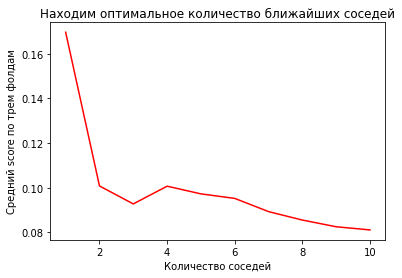

In [28]:
scores = []
for i in range(1, 11):
    my_clf = KNeighborsClassifier(n_neighbors=i, algorithm='brute')
    score = cross_val_score(my_clf, X, target, cv=3, scoring='accuracy')
    scores.append(score.mean())

plt.plot(range(1, 11), scores, 'r')
plt.ylabel('Средний score по трем фолдам'),
plt.xlabel('Количество соседей')
plt.title('Находим оптимальное количество ближайших соседей')
plt.show()

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

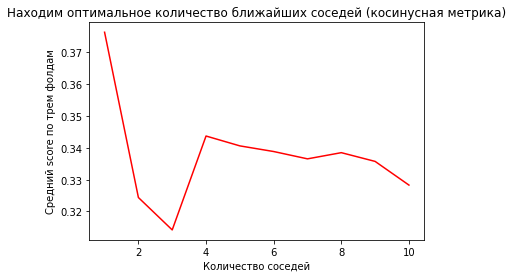

In [29]:
scores = []
for i in range(1, 11):
    my_clf_cosine = KNeighborsClassifier(n_neighbors=i, algorithm='brute', metric='cosine')
    score = cross_val_score(my_clf_cosine, X, target, cv=3, scoring='accuracy')
    scores.append(score.mean())

plt.plot(range(1, 11), scores, 'r')
plt.ylabel('Средний score по трем фолдам'),
plt.xlabel('Количество соседей')
plt.title('Находим оптимальное количество ближайших соседей (косинусная метрика)')
plt.show()

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(data)

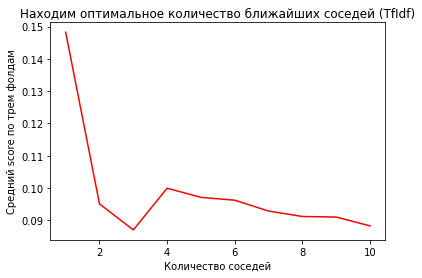

In [31]:
scores = []
for i in range(1, 11):
    my_clf = KNeighborsClassifier(n_neighbors=i, algorithm='brute')
    score = cross_val_score(my_clf, X_tfidf, target, cv=3, scoring='accuracy')
    scores.append(score.mean())

plt.plot(range(1, 11), scores, 'r')
plt.ylabel('Средний score по трем фолдам'),
plt.xlabel('Количество соседей')
plt.title('Находим оптимальное количество ближайших соседей (TfIdf)')
plt.show()

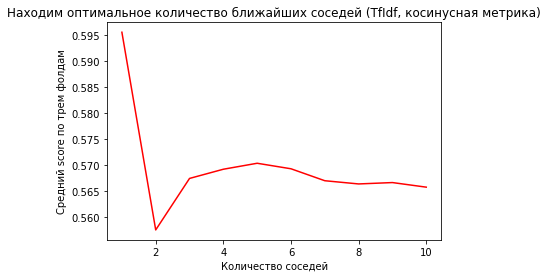

In [33]:
scores = []
for i in range(1, 11):
    my_clf_cosine = KNeighborsClassifier(n_neighbors=i, algorithm='brute',metric='cosine')
    score = cross_val_score(my_clf_cosine, X_tfidf, target, cv=3, scoring='accuracy')
    scores.append(score.mean())

plt.plot(range(1, 11), scores, 'r')
plt.ylabel('Средний score по трем фолдам'),
plt.xlabel('Количество соседей')
plt.title('Находим оптимальное количество ближайших соседей (TfIdf, косинусная метрика)')
plt.show()

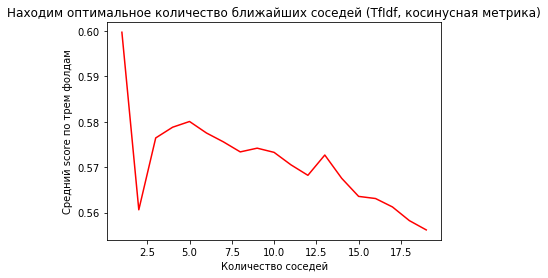

In [33]:
scores = []
for i in range(1, 20):
    my_clf_cosine = KNeighborsClassifier(n_neighbors=i, algorithm='brute',metric='cosine')
    score = cross_val_score(my_clf_cosine, X_tfidf, target, cv=3, scoring='f1_weighted')
    scores.append(score.mean())

plt.plot(range(1, 20), scores, 'r')
plt.ylabel('Средний score по трем фолдам'),
plt.xlabel('Количество соседей')
plt.title('Находим оптимальное количество ближайших соседей (TfIdf, косинусная метрика)')
plt.show()

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [34]:
newsgroups = fetch_20newsgroups(subset = 'test', remove = ['headers','footers', 'quotes'])

In [35]:
data_test = newsgroups['data']
target_test = newsgroups['target']

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [36]:
vectorizer = TfidfVectorizer()
X_test = vectorizer.fit_transform(data_test)

In [37]:
my_clf_cosine = KNeighborsClassifier(n_neighbors=1, algorithm='brute', metric='cosine')
score_test = cross_val_score(my_clf_cosine, X_test, target_test, cv=3, scoring='f1_weighted')
score = cross_val_score(my_clf_cosine, X_tfidf, target, cv=3, scoring='f1_weighted')
print('score_test = ', score_test.mean())
print('score = ', score.mean())
print('diff = ', abs(score_test.mean() - score.mean()))

score_test =  0.5792119154930361
score =  0.5996410790124075
diff =  0.020429163519371407
